In [1]:
# Load CSV files

import numpy as np
import pandas as pd


fact_agg_bookings = pd.read_csv('fact_aggregated_bookings.csv')
fact_bookings = pd.read_csv('fact_bookings.csv')
dim_rooms = pd.read_csv('dim_rooms.csv')
dim_hotels = pd.read_csv('dim_hotels.csv')
dim_date = pd.read_csv('dim_date.csv')


print('fact agg \n',fact_agg_bookings.head())
print('booking\n',fact_bookings.head())
print('rooms\n',dim_rooms.head())
print('hotels\n',dim_hotels.head())
print('date\n',dim_date.head())

fact agg 
    property_id check_in_date room_category  successful_bookings  capacity
0        16559     01-May-22           RT1                   25        30
1        19562     01-May-22           RT1                   28        30
2        19563     01-May-22           RT1                   23        30
3        17558     01-May-22           RT1                   13        19
4        16558     01-May-22           RT1                   18        19
booking
          booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558   2022-04-27    2022-05-01    2022-05-02   
1  May012216558RT12        16558   2022-04-30    2022-05-01    2022-05-02   
2  May012216558RT13        16558   2022-04-28    2022-05-01    2022-05-04   
3  May012216558RT14        16558   2022-04-28    2022-05-01    2022-05-02   
4  May012216558RT15        16558   2022-04-27    2022-05-01    2022-05-02   

   no_guests room_category booking_platform  ratings_given booking_status

In [3]:
#exploring the data

def explore_df(df, name):
    print(f"\n🔍 Dataset: {name}")
    print("➤ Shape (rows, columns):", df.shape)
    print("➤ Column Names:", df.columns.tolist())
    print("➤ Missing Values:\n", df.isnull().sum())
    print("➤ Number of Duplicate Rows:", df.duplicated().sum())


explore_df(fact_bookings, "fact_bookings")
explore_df(fact_agg_bookings, "fact_aggregated_bookings")
explore_df(dim_rooms, "dim_rooms")
explore_df(dim_hotels,"dim_hotels")
explore_df(dim_date, "dim_date")


🔍 Dataset: fact_bookings
➤ Shape (rows, columns): (134590, 12)
➤ Column Names: ['booking_id', 'property_id', 'booking_date', 'check_in_date', 'checkout_date', 'no_guests', 'room_category', 'booking_platform', 'ratings_given', 'booking_status', 'revenue_generated', 'revenue_realized']
➤ Missing Values:
 booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64
➤ Number of Duplicate Rows: 0

🔍 Dataset: fact_aggregated_bookings
➤ Shape (rows, columns): (9200, 5)
➤ Column Names: ['property_id', 'check_in_date', 'room_category', 'successful_bookings', 'capacity']
➤ Missing Values:
 property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int6

In [40]:
fact_bookings[['booking_date', 'check_in_date', 'checkout_date']].info()
fact_bookings[['booking_date']].head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   booking_date   134590 non-null  object
 1   check_in_date  134590 non-null  object
 2   checkout_date  134590 non-null  object
dtypes: object(3)
memory usage: 3.1+ MB


,booking_date
0,2022-04-27
1,2022-04-30
2,2022-04-28
3,2022-04-28
4,2022-04-27
5,2022-05-01
6,2022-04-28
7,2022-04-26
8,2022-04-30
9,2022-04-28


In [41]:
#formatting


fact_bookings['booking_date'] = fact_bookings['booking_date'].astype(str).str.strip()
fact_bookings['check_in_date'] = fact_bookings['check_in_date'].astype(str).str.strip()
fact_bookings['checkout_date'] = fact_bookings['checkout_date'].astype(str).str.strip()

fact_bookings['booking_date'] = pd.to_datetime(fact_bookings['booking_date'],errors='coerce')
fact_bookings['check_in_date'] = pd.to_datetime(fact_bookings['check_in_date'],errors='coerce')
fact_bookings['checkout_date'] = pd.to_datetime(fact_bookings['checkout_date'],errors='coerce')
dim_rooms_renamed = dim_rooms.rename(columns={'room_class': 'room_category'})
fact_bookings['booking_date'] = pd.to_datetime(fact_bookings['booking_date'], errors='coerce')
dim_date['date'] = pd.to_datetime(dim_date['date'], errors='coerce')


fact_bookings[['booking_date', 'check_in_date', 'checkout_date']].info()
fact_bookings[['booking_date','check_in_date', 'checkout_date']].tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   booking_date   134590 non-null  datetime64[ns]
 1   check_in_date  134590 non-null  datetime64[ns]
 2   checkout_date  134590 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 3.1 MB


C:\Users\BIT\AppData\Local\Temp\ipykernel_9516\2804433447.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date['date'] = pd.to_datetime(dim_date['date'], errors='coerce')


,booking_date,check_in_date,checkout_date
134580,2022-07-31,2022-07-31,2022-08-02
134581,2022-07-31,2022-07-31,2022-08-01
134582,2022-07-31,2022-07-31,2022-08-03
134583,2022-07-31,2022-07-31,2022-08-01
134584,2022-07-30,2022-07-31,2022-08-01
134585,2022-07-29,2022-07-31,2022-08-03
134586,2022-07-30,2022-07-31,2022-08-01
134587,2022-07-30,2022-07-31,2022-08-02
134588,2022-07-29,2022-07-31,2022-08-01
134589,2022-07-31,2022-07-31,2022-08-01


In [ ]:
#merging datasets

fact_bookings_merged = pd.merge(
    fact_bookings,
    dim_rooms,
    left_on='room_category',
    right_on='room_id',
    how='left'
)fact_bookings_merged.drop(columns='room_id', inplace=True)

fact_bookings_merged = pd.merge(
    fact_bookings_merged,
    dim_hotels[['property_id', 'city']],
    on='property_id',
    how='left'
)
fact_bookings_merged = pd.merge(
    fact_bookings_merged,
    dim_date,
    left_on='check_in_date',
    right_on = 'date',
    how='left')

agg_with_hotels = pd.merge(
    fact_agg_bookings,
    dim_hotels,
    on='property_id',
    how='left')

agg_with_hotels = pd.merge(
    fact_agg_bookings,
    dim_rooms,
    left_on='room_category',
    right_on='room_id',
    how='left')



In [43]:
#created columns

fact_bookings['day_of_week'] = fact_bookings['check_in_date'].dt.day_name()
fact_bookings['month'] = fact_bookings['check_in_date'].dt.month_name()
fact_bookings.head(20)
fact_bookings['is_cancelled'] = fact_bookings['booking_status'].apply(
    lambda x: 1 if str(x).strip().lower() == 'cancelled' else 0
)


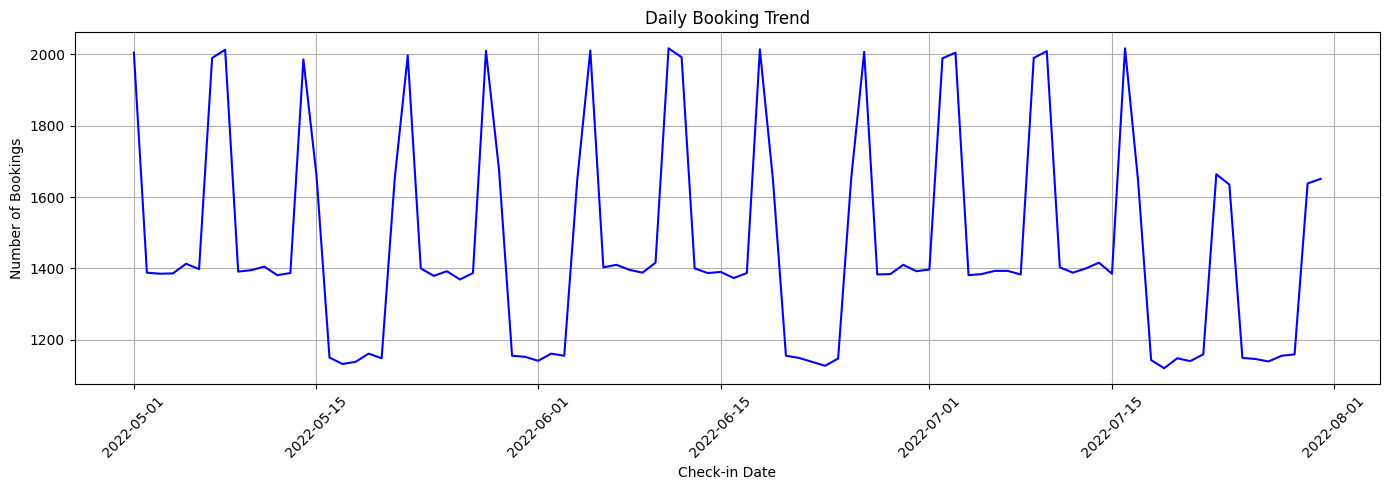

In [44]:
#daily booking trends

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

daily_bookings = fact_bookings.groupby('check_in_date').size().sort_index()


plt.figure(figsize=(14, 5))
plt.plot(daily_bookings.index, daily_bookings.values, color='blue')
plt.title("Daily Booking Trend")
plt.xlabel("Check-in Date")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

day_type
Weekday    84365
Weekend    50225
Name: booking_id, dtype: int64


<Axes: title={'center': 'Weekday vs Weekend\xa0Bookings'}, xlabel='day_type'>

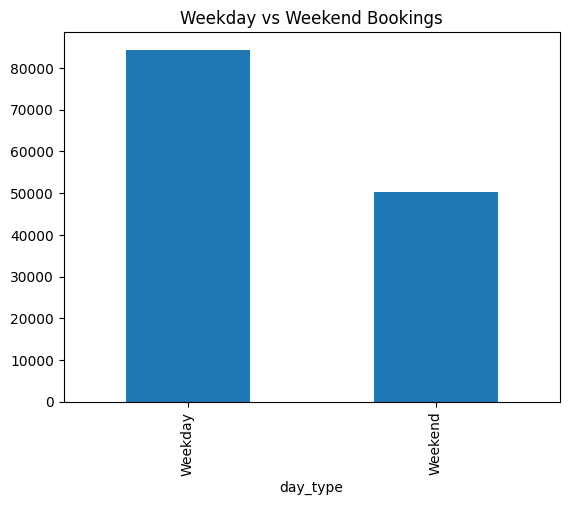

In [45]:
# Booking trends on weekend and weekadays

fact_bookings['day_type'] = fact_bookings['check_in_date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
print(fact_bookings.groupby(['day_type'])['booking_id'].count())


fact_bookings['day_type'] = fact_bookings['check_in_date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
fact_bookings.groupby('day_type')['booking_id'].count().plot(kind='bar', title='Weekday vs Weekend Bookings')

<Axes: title={'center': 'Monthly Booking Trend'}, xlabel='month'>

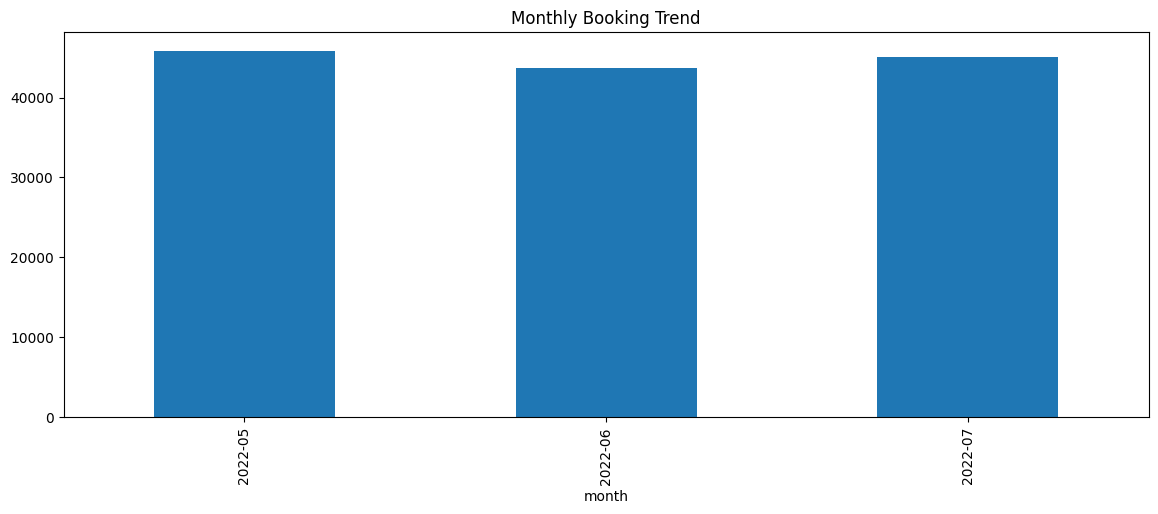

In [46]:
#monthly trends

daily = fact_bookings.groupby('check_in_date').size()
daily.plot(title='Daily Booking Trend', figsize=(14,5))

fact_bookings['month'] = fact_bookings['check_in_date'].dt.to_period('M')
monthly = fact_bookings.groupby('month').size()
monthly.plot(kind='bar', title='Monthly Booking Trend',figsize=(14,5))

<Axes: title={'center': 'Room Popularity'}, xlabel='room_category', ylabel='Number of Bookings'>

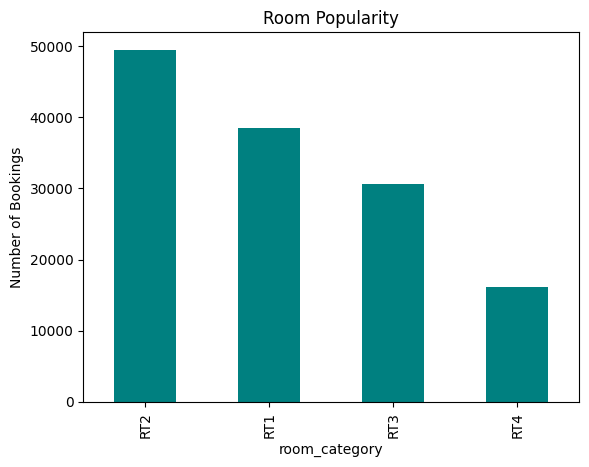

In [47]:
#room type popularity

room_counts = fact_bookings.groupby('room_category')['booking_id'].count().sort_values(ascending=False)
room_counts.plot(kind='bar', title='Room Popularity', ylabel='Number of Bookings',color='teal')

In [48]:
#Calculating daily Occupancy %
fact_agg_bookings['occupancy_percentage'] = (
    fact_agg_bookings['successful_bookings'] / fact_agg_bookings['capacity']) * 100
fact_agg_bookings[['property_id','check_in_date', 'successful_bookings', 'capacity', 'occupancy_percentage']].head(20)

,property_id,check_in_date,successful_bookings,capacity,occupancy_percentage
0,16559,01-May-22,25,30,83.333333
1,19562,01-May-22,28,30,93.333333
2,19563,01-May-22,23,30,76.666667
3,17558,01-May-22,13,19,68.421053
4,16558,01-May-22,18,19,94.736842
5,17560,01-May-22,28,40,70.000000
6,19558,01-May-22,25,40,62.500000
7,19560,01-May-22,23,26,88.461538
8,17561,01-May-22,22,26,84.615385
9,16560,01-May-22,24,34,70.588235


In [49]:
#revenue per available room (RevPAR)
fact_bookings['RevPAR'] = fact_bookings['revenue_realized'] / fact_agg_bookings['capacity']
fact_bookings['RevPAR'].head()

0    333.666667
1    121.333333
2    303.333333
3    191.578947
4    574.736842
Name: RevPAR, dtype: float64

C:\Users\BIT\AppData\Local\Temp\ipykernel_9516\1104638503.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fact_agg_bookings['check_in_date'] = pd.to_datetime(fact_agg_bookings['check_in_date'])


TypeError: datetime64 type does not support sum operations

In [50]:
#revenue leakage 
total_generated = fact_bookings['revenue_generated'].sum()
total_realized = fact_bookings['revenue_realized'].sum()
fact_bookings['revenue_loss_daily'] = fact_bookings['revenue_generated'] - fact_bookings['revenue_realized']
Total_revenue_leakage = fact_bookings['revenue_loss_daily'].sum()

print("Total Revenue Generated:", total_generated)
print("Total Revenue Realized:", total_realized)
print("Total Revenue leakage:", Total_revenue_leakage)

fact_bookings['revenue_loss_daily'].head()

Total Revenue Generated: 2007546215
Total Revenue Realized: 1708771229
Total Revenue leakage: 298774986


0       0
1    5460
2       0
3    5460
4       0
Name: revenue_loss_daily, dtype: int64

In [51]:
# cancellation rate by room category
cancellation_by_room = fact_bookings.groupby('room_category')['is_cancelled'].mean().sort_values(ascending=False) * 100

print("Cancellation % by Room Category:\n", cancellation_by_room)

Cancellation % by Room Category:
 room_category
RT2    24.961115
RT3    24.880586
RT1    24.788014
RT4    24.438499
Name: is_cancelled, dtype: float64


In [52]:
#cancellation by cities
cancellation_by_city = fact_bookings_merged.groupby('city')['is_cancelled'].mean().sort_values(ascending=False) * 100
print("Cancellation % by City:\n", cancellation_by_city)

import pandas as pd
import matplotlib.pyplot as plt

# Group by room category
room_performance = fact_bookings.groupby('room_category').agg({
    'booking_id': 'count',
    'revenue_realized': 'sum'
}).rename(columns={'booking_id': 'num_bookings'})

# Sort by revenue to identify underperformance
room_performance = room_performance.sort_values(by='revenue_realized')

# Plotting
plt.figure(figsize=(10, 6))
room_performance.plot(kind='barh', y='revenue_realized', legend=False, color='skyblue')
plt.title('Room Category vs Revenue Realized')
plt.xlabel('Revenue Realized')
plt.ylabel('Room Category')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

KeyError: 'Column not found: is_cancelled'